In [ ]:
%%capture
%pip install wget


In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


### 平均絕對誤差(MAE)

平均絕對誤差是機器學習中常用的評估指標，特別適合回歸問題。

1. 什麼是MAE?
MAE是指預測值與實際值之間絕對誤差的平均值。

2. **公式**：MAE = (1/n) * Σ|y_i - ŷ_i|
3. **特點**：直觀、單位與原始數據一致、對所有誤差權重相同

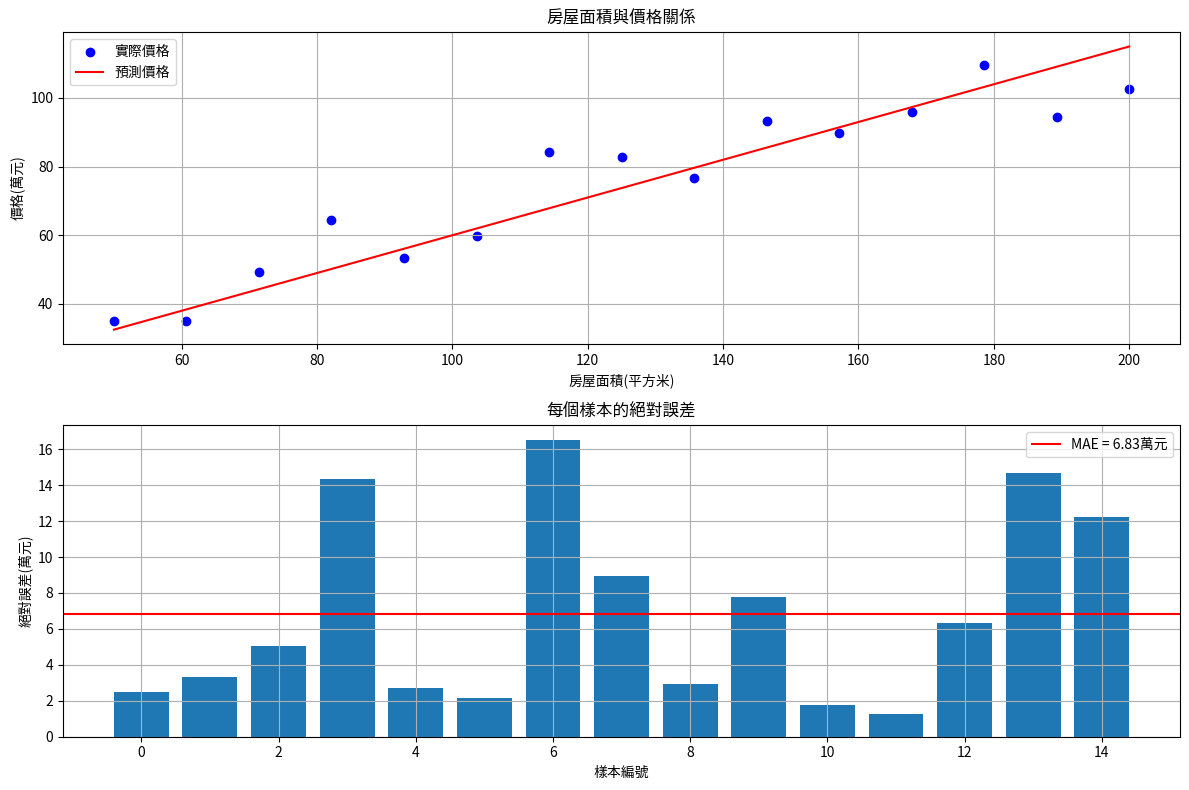

平均絕對誤差(MAE): 6.83萬元

數據集詳情:
    房屋面積(平方米)  實際價格(萬元)  預測價格(萬元)  絕對誤差(萬元)
0       50.00     34.97     32.50      2.47
1       60.71     35.05     38.39      3.35
2       71.43     49.33     44.29      5.05
3       82.14     64.52     50.18     14.34
4       92.86     53.37     56.07      2.70
5      103.57     59.80     61.96      2.16
6      114.29     84.36     67.86     16.51
7      125.00     82.67     73.75      8.92
8      135.71     76.73     79.64      2.91
9      146.43     93.28     85.54      7.75
10     157.14     89.65     91.43      1.78
11     167.86     96.06     97.32      1.26
12     178.57    109.56    103.21      6.35
13     189.29     94.44    109.11     14.67
14     200.00    102.75    115.00     12.25

手動計算的MAE: 6.83萬元


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 步驟1: 建立假數據集 - 房屋面積與價格
np.random.seed(42)  # 設定隨機種子以確保結果可重現
house_size = np.linspace(50, 200, 15)  # 15間房子的面積，從50到200平方米
actual_price = house_size * 0.6 + np.random.normal(0, 10, 15)  # 真實價格(萬元)

# 步驟2: 創建預測模型(這裡用簡單線性關係模擬預測結果)
predicted_price = house_size * 0.55 + 5  # 預測價格(萬元)

# 步驟3: 計算MAE
mae = mean_absolute_error(actual_price, predicted_price)

# 步驟4: 創建數據框以便於展示
df = pd.DataFrame({
    '房屋面積(平方米)': house_size,
    '實際價格(萬元)': actual_price,
    '預測價格(萬元)': predicted_price,
    '絕對誤差(萬元)': np.abs(actual_price - predicted_price)
})

# 步驟5: 視覺化結果
plt.figure(figsize=(12, 8))

# 繪製實際價格和預測價格
plt.subplot(2, 1, 1)
plt.scatter(house_size, actual_price, color='blue', label='實際價格')
plt.plot(house_size, predicted_price, color='red', label='預測價格')
plt.title('房屋面積與價格關係')
plt.xlabel('房屋面積(平方米)')
plt.ylabel('價格(萬元)')
plt.legend()
plt.grid(True)

# 繪製絕對誤差
plt.subplot(2, 1, 2)
plt.bar(range(len(house_size)), np.abs(actual_price - predicted_price))
plt.axhline(y=mae, color='r', linestyle='-', label=f'MAE = {mae:.2f}萬元')
plt.title('每個樣本的絕對誤差')
plt.xlabel('樣本編號')
plt.ylabel('絕對誤差(萬元)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 輸出結果
print(f"平均絕對誤差(MAE): {mae:.2f}萬元")
print("\n數據集詳情:")
print(df.round(2))

# 手動計算MAE，展示公式實現
manual_mae = np.mean(np.abs(actual_price - predicted_price))
print(f"\n手動計算的MAE: {manual_mae:.2f}萬元")
